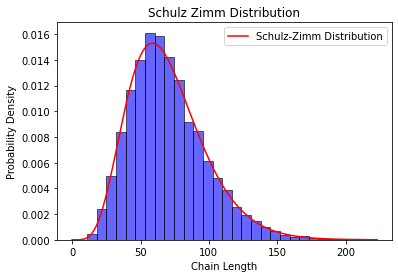

what type is this <class 'numpy.ndarray'>
Number of the polymer chains 4000
277611
shortest chain is 10
longest chain is 222
Number of the polymer chains 4000
277611
Average molecular weight is  80.51174124944616
number average molecular weight is  69.40275
Dispersity is  1.1600655773646744


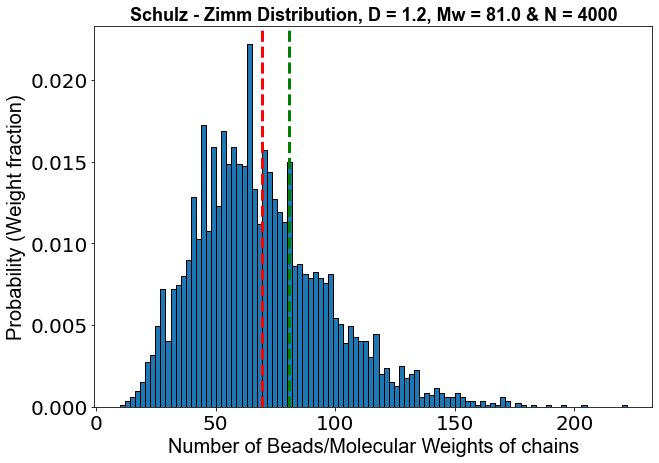

input params detected
1
beads per monomer:  1
Maximum chain length is 222
Minimum chain length is 10
number of polymers:  4000
minimum seperation  1
bead density:  0.85

Total number of particles: 277611
Number of chains = 4000
actual density 0.85
Average beads in main chain = 69.40275
beads in side chain = 0
average side chain length = 0.0
monomers total = 277611
number of bonds = 273611
seed =  <bound method Random.seed of <random.Random object at 0x7f976f81de10>>

Geometry:
dens =  0.85
vol =  326601.17647058825

metric:    68.8662    68.8662    68.8662


what is cx:  277611
Polymers built.
what is cx size: 277611
what is n: 273611
LAMMPS output complete.


In [3]:
# Author: Sohil Kollipara
# Modified by Taofeek Tejuosho

# lammps types
# 1 end cap
# 2 normal bead
# 3 side chain start
# 4 side chain
# 5 side chain end cap

import math
import random
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.special import gamma, factorial
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from datetime import datetime

# Function: generateInputFile
# inputs nbeadInput - number of beads (ignored), monomers per polymer (only used if monodisperesed) - number of monomers in each polymer, npoly



def generateInputFile(nbeadsInput, monomers_per_polymer_input, npoly_input, minsep_input, dens_input, bond_length_input, filename, nmin, nmax):
    class Schulz_Zimm(rv_continuous):
        def _pdf(self, x, z, Mn):
            #return (x**(alpha - 1) * np.exp(-x / beta)) / (beta**alpha * np.math.gamma(alpha))
            return (z**(z+1)/np.math.gamma(z+1))*(x**(z-1)/Mn**(z))*np.exp(-z*x/Mn)
            

    # Parameters for the distribution
    z = 6.25 #1.25# 6.25   # Shape parameter
    Mn = 70 #33.3  # Scale parameter - Number average molecular weight
    num_samples = 4000 #Number of chains
    nmin = 0 #Minimum chain length
    nmax = 950 #Maximum chain length
    # Create an instance of the custom gamma distribution to generate random samples from the distribution
    np.random.seed(60) #************ used to change
    SZ = Schulz_Zimm(momtype=1, a = nmin, b = nmax, name='SZ')
    monomers_per_polymer = SZ.rvs(z=z, Mn=Mn,  size=num_samples)
        #monomers_per_polymer = brentq(SZ.ppf, 0, 1000, args=(random.random(), z, Mn), maxiter=1000)
        # Create a histogram to visualize the distribution
    plt.hist(monomers_per_polymer, bins=30, edgecolor = "black", density=True, alpha=0.6, color='blue')

        # Calculate the theoretical distribution for visualization
    x_vals = np.linspace(0, max(monomers_per_polymer), num_samples)
    y_vals = SZ.pdf(x_vals, z = z, Mn=Mn)
    plt.plot(x_vals, y_vals / np.trapz(y_vals, x_vals), color='red', label='Schulz-Zimm Distribution')
    #plt.ylim([0, 0.07])
    plt.xlabel('Chain Length')
    plt.ylabel('Probability Density')
    plt.title('Schulz Zimm Distribution')
    plt.legend()
    plt.show()
    #print(X)
    print("what type is this",type(monomers_per_polymer))
    monomers_per_polymer = monomers_per_polymer.astype(int)
    
    #monomers_per_polymer = [math.ceil(x) for x in monomers_per_polymer]
    #list_mon = list(monomers_per_polymer)
    #A function to remove all the zeros in the melts
    #def remove_zeros(arr):
     #   mask = (arr !=0)
     #   result = arr[mask]
     #   return result, mask
    def remove_and_add(arr):
    # Find the minimum value in the array
    
    
    # Count the occurrences of 1 and 2 in the array
        count_zeros = np.count_nonzero(arr == 0)
        count_ones = np.count_nonzero(arr == 1)
        count_twos = np.count_nonzero(arr == 2)
        count_threes = np.count_nonzero(arr == 3)
    
    # Create a new array with 0s and 1s removed
        new_arr = arr[(arr != 0) & (arr != 1) & (arr !=2) & (arr !=3) ]
        #new_arr = arr[(arr != 0) & (arr != 1)]
        min_val = np.min(new_arr)
    # Add the next lowest number to the array
        new_arr = np.append(new_arr, [min_val] * (count_ones + count_zeros + count_twos + count_threes))
        
        return new_arr
    original_array = monomers_per_polymer
    result_array = remove_and_add(monomers_per_polymer)

    #print("Original Array:", original_array)
    #print("Resulting Array:", result_array)
    monomers_per_polymer = result_array
    monomers_per_polymer = monomers_per_polymer.astype(int)
    #new_polymer, mask = remove_zeros(monomers_per_polymer)
    #print(f"This is the number of chains {len(new_polymer)} and number of chains with zeros is {len(mask)}")
    #monomers_per_polymer = new_polymer
    #print("what data type", (monomers_per_polymer))
    list_mon = monomers_per_polymer.tolist()
    print("Number of the polymer chains", len(list_mon))
    print(sum(monomers_per_polymer))
    print(f"shortest chain is {min(monomers_per_polymer)}")
    print(f"longest chain is {max(monomers_per_polymer)}")
    print("Number of the polymer chains", len(list_mon))
    print(sum(monomers_per_polymer))
    """Calculating the dispersity"""
    z = Counter(list_mon)
    data = pd.DataFrame({"No_chains":z})
    data.index
    data.reset_index(inplace = True)
    data = data.rename(columns = {'index': "No_of_monomers"})
    data['weight_fraction'] = data["No_of_monomers"]*data["No_chains"]/sum(data["No_of_monomers"]* data["No_chains"])  
    Mw = sum((data['No_of_monomers']*data['weight_fraction']))
    print("Average molecular weight is ", Mw)
    Mn = sum((data['No_of_monomers']*data['No_chains']))/sum(data['No_chains'])
    print("number average molecular weight is ", Mn)
    D = Mw/Mn
    print("Dispersity is ", D)
    a = np.array(list_mon)
    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(a, bins = 100, edgecolor = "black", density = True)
    ax.axvline(monomers_per_polymer.mean(), color='r', linestyle='dashed', linewidth=3)
    ax.axvline(Mw, color='g', linestyle='dashed', linewidth=3)
    #plt.title('SZ (MW = , D = 41.4)', fontsize = 30, fontweight = 'bold', fontname="Arial")

    plt.title(f'Schulz - Zimm Distribution, D = {round(D,1)}, Mw = {round(Mw,0)} & N = {num_samples}', fontsize = 18, fontweight = 'bold', fontname="Arial")
    plt.xlabel("Number of Beads/Molecular Weights of chains", fontsize = 20, fontname="Arial")
    plt.ylabel("Probability (Weight fraction)", fontsize = 20, fontname="Arial")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.ylim([0, 0.0175])
    #plt.xlim([0,1200])
    plt.show()   
    pass
    #random_seed = 12
    polydispersity = True
      
    if nbeadsInput > 0:
        print("input params detected")
        nbeads = nbeadsInput
        if not polydispersity:
            monomers_per_polymer = monomers_per_polymer_input  # monomers in polymer (including x)
        npoly = npoly_input  # number of polymers
        minsep = minsep_input  # minimum seperation to prevent overlap
        # pendant_size = 1.0  # pendant group diameter/bead diameter
        dens = dens_input  # bead density
        bond_length = bond_length_input  # bond length
        #p_branch_end = p_branch_end_input
    else:
        print("no input params or incorrect params (7 fields)")
        print(
            "fields are:\nbeads per monomer (mainchain only)\nmonomers per polymer\nnumber of polymers\nminimum "
            "seperation to prevent overlap\nbead density\nbond length\nprobability of end of side branch")
        nbeads = 5  # beads per monomer mainchain
        #monomers_per_polymer = 3  # monomers in polymer (including x)
        npoly = 3  # number of polymers
        minsep = 1.0  # minimum seperation to prevent overlap
        # pendant_size = 1.0  # pendant group diameter/bead diameter
        dens = 0.85  # bead density
        bond_length = 0.97  # bond length
        p_branch_end = 0.5
    minsep2 = minsep ** 2
    print(minsep2)
    print("beads per monomer: ", nbeads)
    # print("number of beads in x segement of only backbone: ", nxbeads)
    #print("monomers per polymer: ", monomers_per_polymer)
    print("Maximum chain length is", max(monomers_per_polymer))
    print("Minimum chain length is", min(monomers_per_polymer))
    print("number of polymers: ", npoly)
    print("minimum seperation ", minsep)
    # print("pendant size: ", pendant_size)
    print("bead density: ", dens)

    #                        0                   1                   2                 3                4
    # type_names = ['Polymer Endcap Bead', 'Main Chain Bead', 'Branch Start Bead', 'Branch Bead', 'Branch Endcap']
    # bond_type_names = ['Endcap to Main Bead', 'Main bead to main bead',
    #                    'main bead to side chain start', 'side chain start to side chain middle',
    #                    'side chain middle to side chain end', 'side chain middle to side chain end']
    # branch cant occur at first or last main chain beads in the nbead monomer
    # for branching negative binomial distribution? Trials needed to get endcap defines final monomer
    bead_count = 0 #accumulator
    side_chain_total_length = 0
    polymers = []
    for i in range(npoly):
        monomers = []
        for j in range(monomers_per_polymer[i]):
            monomer = []
            # starting bead here (0)
            if j == 0:
                #TODO change starting bead back to endcap
                monomer.append(0)
                bead_count = bead_count + 1
            elif j == monomers_per_polymer[i] - 1:
                #TODO change back to endcap
                monomer.append(0)
                bead_count = bead_count + 1
            # regular main chain bead if not starting bead
            else:
                monomer.append(1)
                bead_count = bead_count + 1
 
 
         
            # append individual monomer to monomers list
            monomers.append(monomer)
        # append monomers that constitute polymer into polymer list
        polymers.append(monomers)

    INPUT_LAMMPS = open(filename, 'w')
    if polydispersity:
        nmonomers = np.sum(monomers_per_polymer)
    else:
        nmonomers = monomers_per_polymer * npoly
    #ntypes = len(type_names)
    # is this right?
    nbranches = nbeads * nmonomers
    ntot = bead_count
    vol = ntot / dens
    side = math.pow(vol, 1 / 3)
    dim = ntot
    hx, hy, hz = (side, side, side)
    hx2, hy2, hz2 = (hx / 2, hy / 2, hz / 2)
    if not polydispersity:
        nbonds = side_chain_total_length + (((monomers_per_polymer * nbeads) - 1) * npoly)
    else:
        ## TODO get working for branches
        nbonds = np.sum(monomers_per_polymer) - monomers_per_polymer.size
    print()
    print("Total number of particles:", ntot)
    print("Number of chains =", npoly)
    print("actual density", ntot / vol)
    print("Average beads in main chain =", np.average(monomers_per_polymer) * nbeads)
    print("beads in side chain =", side_chain_total_length)
    print("average side chain length =", side_chain_total_length / nmonomers)
    print("monomers total =", nmonomers)
    print("number of bonds =", nbonds)
    #print("Number of atoms types = ", ntypes)
    print("seed = ", random.seed)

    print()
    print("Geometry:")
    print("dens = ", dens)

    print("vol = ", vol)

    print()
    print("metric: %10.4f %10.4f %10.4f\n\n" % (hx, hy, hz))

    # position variables - initializes the position
    xc = np.zeros(dim)
    yc = np.zeros(dim)
    zc = np.zeros(dim)
    # velocity variables - initializes the velocity
    cx = np.zeros(dim)
    print("what is cx: ",cx.size)
    cy = np.zeros(dim)
    cz = np.zeros(dim)
    # Building polymers

    Rg2Ave = 0.0
    RgAve = 0.0
    Rend2Ave = 0.0
    types = np.zeros(dim)
    molnum = np.zeros(dim)
    q = np.zeros(dim)
    k = 0
    bonds = []

    for polymerNum in range(len(polymers)):
        lengthcurrentpoly = 0
        firstInPolymer = True
        for monomerNum in range(len(polymers[polymerNum])):
            inSideChain = False
            sideChainStart = (0, 0, 0)
            for unitNum in range(len(polymers[polymerNum][monomerNum])):
                unit = polymers[polymerNum][monomerNum][unitNum]
                types[k] = unit
                molnum[k] = polymerNum + 1
                if firstInPolymer:
                    xc[k] = random.random() * hx #returns a random floating number between 0 and 1
                    yc[k] = random.random() * hy
                    zc[k] = random.random() * hz
                    firstInPolymer = False
                else:
                    if unitNum > 0:
                        prevUnit = polymers[polymerNum][monomerNum][unitNum - 1]
                    else:
                        prevUnit = polymers[polymerNum][monomerNum - 1][-1]
                        # pick random direction; scale to be bond length 
                    dx = random.random() - 0.5
                    dy = random.random() - 0.5
                    dz = random.random() - 0.5
                    r = math.sqrt(dx ** 2 + dy ** 2 + dz ** 2)
                    scale = bond_length / r
                    dx = scale * dx
                    dy = scale * dy
                    dz = scale * dz
                    if types[k] == 2:
                        inSideChain = True
                        xc[k] = xc[k - 1] + dx
                        yc[k] = yc[k - 1] + dy
                        zc[k] = zc[k - 1] + dz
                        sideChainStart = (xc[k], yc[k], zc[k])
                    elif types[k] == 4 or types[k] == 3:
                        xc[k] = xc[k - 1] + dx
                        yc[k] = yc[k - 1] + dy
                        zc[k] = zc[k - 1] + dz
                    elif (types[k] == 1 or types[k] == 0) and inSideChain:
                        xc[k] = sideChainStart[0] + dx
                        yc[k] = sideChainStart[1] + dy
                        zc[k] = sideChainStart[2] + dz
                        inSideChain = False
                    else:
                        xc[k] = xc[k - 1] + dx
                        yc[k] = yc[k - 1] + dy
                        zc[k] = zc[k - 1] + dz
                k = k + 1
    #no charges
    for k in range(types.size):
        if xc[k] > hx:
            cx[k] = int(xc[k] / hx)
            xc[k] = xc[k] - cx[k] * hx - hx2
        elif (xc[k] < 0.0):
            cx[k] = -int((-xc[k] + hx) / hx)
            xc[k] = xc[k] - cx[k] * hx - hx2
        else:
            cx[k] = 0
            xc[k] = xc[k] - hx2
        if yc[k] > hy:
            cy[k] = int(yc[k] / hy)
            yc[k] = yc[k] - cy[k] * hy - hy2
        elif yc[k] < 0.0:
            cy[k] = -int((-yc[k] + hy) / hy)
            yc[k] = yc[k] - cy[k] * hy - hy2
        else:
            cy[k] = 0
            yc[k] = yc[k] - hy2
        if zc[k] > hz:
            cz[k] = int(zc[k] / hz)
            zc[k] = zc[k] - cz[k] * hz - hz2
        elif zc[k] < 0.0:
            cz[k] = -int((-zc[k] + hz) / hz)
            zc[k] = zc[k] - cz[k] * hz - hz2
        else:
            cz[k] = 0
            zc[k] = zc[k] - hz2

    print("Polymers built.")
    x_date = datetime.now()
    
    INPUT_LAMMPS.write("#")
    INPUT_LAMMPS.write(x_date.strftime("%d-%B-%Y"))
    INPUT_LAMMPS.write("\n")
    INPUT_LAMMPS.write("%10i    atoms\n" % ntot)
    INPUT_LAMMPS.write("%10i    bonds\n" % nbonds)
    # INPUT_LAMMPS.write("%10i    angles\n" %     0)
    # INPUT_LAMMPS.write("%10i    dihedrals\n" % 0)
    # INPUT_LAMMPS.write("%10i    impropers\n" % npendant)
    # INPUT_LAMMPS.write("%10i    impropers\n" % 0)
    INPUT_LAMMPS.write("\n")
    #TODO change back to full types
    INPUT_LAMMPS.write("1    atom types\n")
    INPUT_LAMMPS.write("1    bond types\n")
    #INPUT_LAMMPS.write("%10i    atom types\n" % ntypes)
    #INPUT_LAMMPS.write("%10i    bond types\n" % 2)
    ##INPUT_LAMMPS.write("%10i    improper types\n" % 1)

    INPUT_LAMMPS.write("\n")
    INPUT_LAMMPS.write(" %16.8f %16.8f   xlo xhi\n" % (-hx2, hx2))
    INPUT_LAMMPS.write(" %16.8f %16.8f   ylo yhi\n" % (-hy2, hy2))
    INPUT_LAMMPS.write(" %16.8f %16.8f   zlo zhi\n" % (-hz2, hz2))
    INPUT_LAMMPS.write("\n")
    INPUT_LAMMPS.write("Atoms\n")
    INPUT_LAMMPS.write("\n")

    mass = 1.0
    #chains
    for i in range(dim):
        unit = types[i]
        # could use a dictionary here between type and segname
        imol = molnum[i]  # this implies the polymers must be placed in before the counterions
        #TODO changed the default type to 1 (third input)

        INPUT_LAMMPS.write("%6i %6i %2i %6.2f %9.4f %9.4f %9.4f %6i %6i %6i\n" % (
            i+1, imol, 1, q[i], xc[i], yc[i], zc[i], cx[i], cy[i], cz[i]))
    ##    INPUT_PDB.write("ATOM  %5i  %2s  NONE    1     %7.3f %7.3f %7.3f  1.00  0.00\n" %  (i,aname, xc[i], yc[i], zc[i] ))
    ##    INPUT_PSF.write("%8i %4s %3i  %2s   %2s   %2s   %8.6f       %7.4f %10i\n" %  (i,segname,imol,aname,aname,aname,q[i],typeb[i],0))

    # Bonds
    INPUT_LAMMPS.write("\n")
    INPUT_LAMMPS.write("Bonds\n")
    INPUT_LAMMPS.write("\n")
    bonds = np.zeros(nbonds)

    inSideChain = False
    bond_count = 0
    sideChainStart = 0
    nbonds_actual = sum(monomers_per_polymer) - len(monomers_per_polymer)
    #for i in range(cx.size - 1):
    print("what is cx size:", cx.size)
    n = 0
    for i in range(cx.size - 1):
        if molnum[i + 1] == molnum[i]:
            bond_count = bond_count + 1
            n+=1
            if (types[i + 1] == 1 and types[i] == 0) or (types[i + 1] == 0 and types[i] == 1):
                INPUT_LAMMPS.write("%8i  1 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif (types[i+1]==0 and types[i]==0):
                bond_count = bond_count-1
            elif (types[i + 1] == 2 and types[i] == 0):
                inSideChain = True
                sideChainStart = i + 1
                INPUT_LAMMPS.write("%8i  2 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif (types[i + 1] == 0) and inSideChain:
                inSideChain = False
                INPUT_LAMMPS.write("%8i  2 %8i %8i\n" % (bond_count, sideChainStart+1, i + 2))
            elif (types[i + 1] == 1 and types[i] == 1):
                #TODO change back to 3
                INPUT_LAMMPS.write("%8i  1 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif types[i + 1] == 2 and types[i] == 1:
                inSideChain = True
                sideChainStart = i + 1
                INPUT_LAMMPS.write("%8i  4 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif (types[i + 1] == 1) and inSideChain:
                inSideChain = False
                INPUT_LAMMPS.write("%8i  4 %8i %8i\n" % (bond_count, sideChainStart+1, i + 2))
            elif types[i + 1] == 3 and types[i] == 2:
                INPUT_LAMMPS.write("%8i  5 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif types[i + 1] == 4 and types[i] == 2:
                INPUT_LAMMPS.write("%8i  6 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif (types[i + 1] == 3 and types[i] == 3):
                INPUT_LAMMPS.write("%8i  7 %8i %8i\n" % (bond_count, i+1, i + 2))
            elif types[i + 1] == 4 and types[i] == 3:
                INPUT_LAMMPS.write("%8i  8 %8i %8i\n" % (bond_count, i+1, i + 2))
    print(f"what is n:", n)
    INPUT_LAMMPS.write("\n")
    INPUT_LAMMPS.write("Masses\n")
    INPUT_LAMMPS.write("\n")
    #TODO changed to default 1 type, 1 mass
    #for ii in range(ntypes):
    #    INPUT_LAMMPS.write("%3i  1.0\n" % ii)
    INPUT_LAMMPS.write("1  1.0\n")
    INPUT_LAMMPS.close()
    print("LAMMPS output complete.")
    
generateInputFile(1,0,4000,1,0.85,0.97,'input.lammps',nmin = 0, nmax = 950)

In [2]:
pip install scipy==1.7.0

     |████████████████████████████████| 32.1 MB 4.3 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
Note: you may need to restart the kernel to use updated packages.


##### To account for dihedrals and angles:

In [ ]:
# ... (Previous code)

# Define angle and dihedral parameters
angle_coeff = 1.0  # Modify as needed
dihedral_coeff = 1.0  # Modify as needed

# ... (Rest of the previous code)

# Add angle and dihedral sections
INPUT_LAMMPS.write("\n")
INPUT_LAMMPS.write("Angles\n")
INPUT_LAMMPS.write("\n")

# Calculate and specify angle interactions
for i in range(1, ntot - 2):
    if molnum[i + 1] == molnum[i] and molnum[i + 2] == molnum[i]:
        j = i + 1
        k = i + 2
        angle_value = # Calculate the angle value (in degrees) based on bead positions
        INPUT_LAMMPS.write("%8i  1 %8i %8i %8i\n" % (i, angle_coeff, i, j, k))

INPUT_LAMMPS.write("\n")
INPUT_LAMMPS.write("Dihedrals\n")
INPUT_LAMMPS.write("\n")

# Calculate and specify dihedral interactions
for i in range(1, ntot - 3):
    if molnum[i + 1] == molnum[i] and molnum[i + 2] == molnum[i] and molnum[i + 3] == molnum[i]:
        j = i + 1
        k = i + 2
        m = i + 3
        dihedral_value = # Calculate the dihedral value (in degrees) based on bead positions
        INPUT_LAMMPS.write("%8i  1 %8i %8i %8i %8i\n" % (i, dihedral_coeff, i, j, k, m))

# ... (Rest of the previous code)


In [ ]:
def generate_series(starting_number, increment_number, repetitions, total_iterations):
    current_number = starting_number
    iterations = 0

    while iterations < total_iterations:
        for _ in range(repetitions):
            print(current_number)
            current_number += increment_number * 6
            iterations += 1
            if iterations == total_iterations:
                break

# Example usage:
generate_series(starting_number=138149889, increment_number=18400, repetitions=10, total_iterations=450)